# Журавлев Александр Дмитриевич ББМО-02-23 Номер в списке - 8 Вариант: 8%16-1 = 9 MAC

Примеры логов MAC:

*   Oct  10 10:21:30 MacBook-Pro com.apple.hangtracer[194]: Application XYZ has stopped unexpectedly
*   Oct  10 10:18:25 MacBook-Pro kernel[0]: IOUSBHost: Port 1 is not enabled
*   Oct  10 10:15:30 MacBook-Pro airportd[92]: Airport Link Up on en0

Лог состоит из 5-ти частей:
* Дата и время - Oct  10 10:21:30
* Имя хоста - MacBook-Pro
* Служба - com.apple.hangtracer
* ID процесса - [194]
* Сообщение - Application XYZ has stopped unexpectedly

In [31]:
!git clone https://github.com/logpai/loghub

fatal: destination path 'loghub' already exists and is not an empty directory.


Импортирование библиотек

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os.path

Создание БД

In [33]:
if not os.path.isdir("./db/"): os.makedirs("./db/")

Подключение к БД и создание таблицы

In [34]:
db_path = './db/log-MAC-analysis.db'

connect = sqlite3.connect(db_path)
cur = connect.cursor()
cur.execute("DROP TABLE IF EXISTS LOGI")
cur.execute("CREATE TABLE LOGI (Id INTEGER PRIMARY KEY AUTOINCREMENT, Datetime text, Host, Service text, Message text)")

connect.commit()
cur.close()
connect.close()

Подключение к БД и парсинг файла с логами

In [40]:
connect = sqlite3.connect(db_path)
cur = connect.cursor()
cur.execute("DELETE FROM LOGI")

with open('./loghub/Mac/Mac_2k.log', 'r', encoding='utf-8') as log_file:
    for line in log_file:
        logs = line.split(" ")
        datetime = "2024 " + " ".join(e for e in logs[0:4])
        host = logs[4]
        service = logs[5]
        message = " ".join(e for e in logs[6:]).replace("\n", "")

        print(datetime, host, service, message)

        query = f'INSERT INTO LOGI (Datetime, Host, Service, Message) VALUES ("{datetime}", "{host}", "{service}", "{message}")'

        try:
            cur.execute(query)
        except Exception as e:
            print(f"Error executing query: {query}\n{e}")

connect.commit()
cur.close()
connect.close()

2024 Jul  1 09:00:55 calvisitor-10-105-160-95 kernel[0]: IOThunderboltSwitch<0>(0x0)::listenerCallback - Thunderbolt HPD packet for route = 0x0 port = 11 unplug = 0
2024 Jul  1 09:01:05 calvisitor-10-105-160-95 com.apple.CDScheduler[43]: Thermal pressure state: 1 Memory pressure state: 0
2024 Jul  1 09:01:06 calvisitor-10-105-160-95 QQ[10018]: FA||Url||taskID[2019352994] dealloc
2024 Jul  1 09:02:26 calvisitor-10-105-160-95 kernel[0]: ARPT: 620701.011328: AirPort_Brcm43xx::syncPowerState: WWEN[enabled]
2024 Jul  1 09:02:26 authorMacBook-Pro kernel[0]: ARPT: 620702.879952: AirPort_Brcm43xx::platformWoWEnable: WWEN[disable]
2024 Jul  1 09:03:11 calvisitor-10-105-160-95 mDNSResponder[91]: mDNS_DeregisterInterface: Frequent transitions for interface awdl0 (FE80:0000:0000:0000:D8A5:90FF:FEF5:7FFF)
2024 Jul  1 09:03:13 calvisitor-10-105-160-95 kernel[0]: ARPT: 620749.901374: IOPMPowerSource Information: onSleep,  SleepType: Normal Sleep,  'ExternalConnected': Yes, 'TimeRemaining': 0,
2024 Ju

Запись в БД

In [42]:
connect = sqlite3.connect(db_path)
cur = connect.cursor()
cur.execute("SELECT * FROM LOGI")
rows = cur.fetchall()
cur.close()
connect.close()

logi = pd.DataFrame(rows, columns=("Id", "Datetime", "Host", "Service", "Message"))

Таблица LOGI

In [43]:
logi

,Id,Datetime,Host,Service,Message
0,1,2024 Jul 1 09:00:55,calvisitor-10-105-160-95,kernel[0]:,IOThunderboltSwitch<0>(0x0)::listenerCallback ...
1,2,2024 Jul 1 09:01:05,calvisitor-10-105-160-95,com.apple.CDScheduler[43]:,Thermal pressure state: 1 Memory pressure stat...
2,3,2024 Jul 1 09:01:06,calvisitor-10-105-160-95,QQ[10018]:,FA||Url||taskID[2019352994] dealloc
3,4,2024 Jul 1 09:02:26,calvisitor-10-105-160-95,kernel[0]:,ARPT: 620701.011328: AirPort_Brcm43xx::syncPow...
4,5,2024 Jul 1 09:02:26,authorMacBook-Pro,kernel[0]:,ARPT: 620702.879952: AirPort_Brcm43xx::platfor...
...,...,...,...,...,...
1932,1933,2024 Jul 8 07:32:03,calvisitor-10-105-162-124,kernel[0]:,ARPT: 790564.863081: wl0: MDNS: IPV6 Addr: 260...
1933,1934,2024 Jul 8 07:43:38,calvisitor-10-105-162-124,kernel[0]:,USBMSC Identifier (non-unique): 000000000820 0...
1934,1935,2024 Jul 8 07:57:11,calvisitor-10-105-162-124,kernel[0]:,AppleCamIn::systemWakeCall - messageType = 0xE...
1935,1936,2024 Jul 8 08:10:46,calvisitor-10-105-162-124,kernel[0]:,Wake reason: RTC (Alarm)


Визуализация частоты сообщений

<ipython-input-53-5a0a11b24905>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


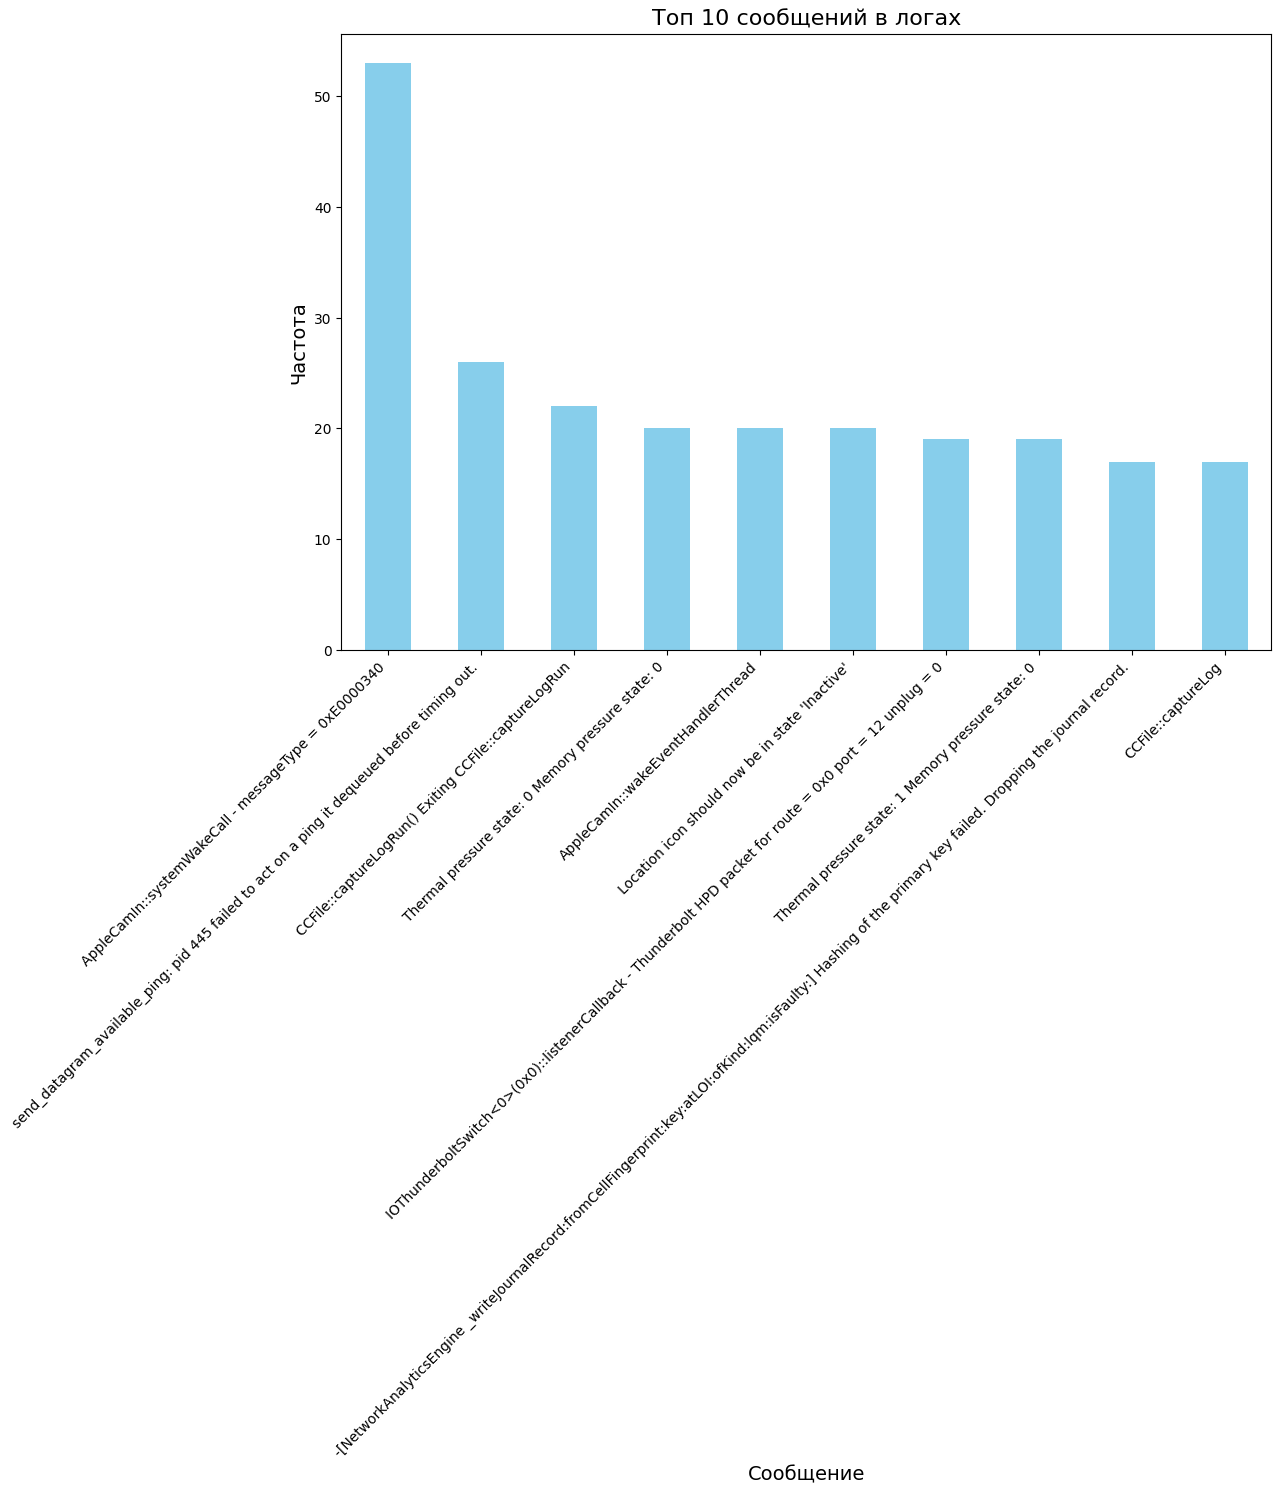

In [53]:
logi['Datetime'] = pd.to_datetime(logi['Datetime'])
logi['Host'] = logi['Host'].astype(str)
logi['Service'] = logi['Service'].astype(str)
logi['Message'] = logi['Message'].astype(str)

message_counts = logi['Message'].value_counts().head(10)

plt.figure(figsize=(12, 8))
message_counts.plot(kind='bar', color='skyblue')
plt.title('Топ 10 сообщений в логах', fontsize=16)
plt.xlabel('Сообщение', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Визуализация количества записей по хостам

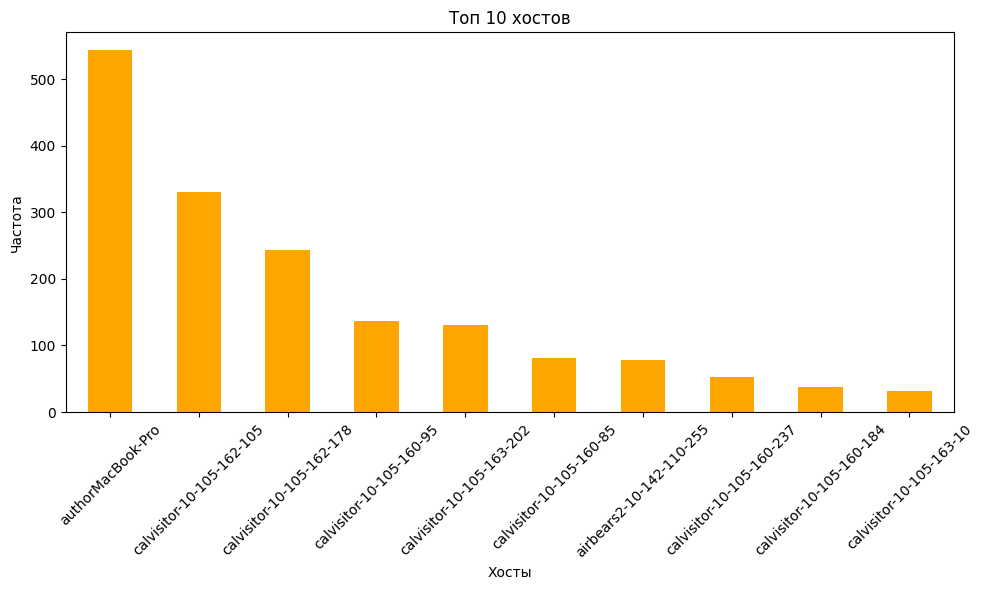

In [54]:
host_counts = logi['Host'].value_counts().head(10)

plt.figure(figsize=(10, 6))
host_counts.plot(kind='bar', color='orange')
plt.title('Топ 10 хостов')
plt.xlabel('Хосты')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()